In [19]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv("C:/Python/Jupyter Notebooks/Twitter_Workspace/finaldata.csv")

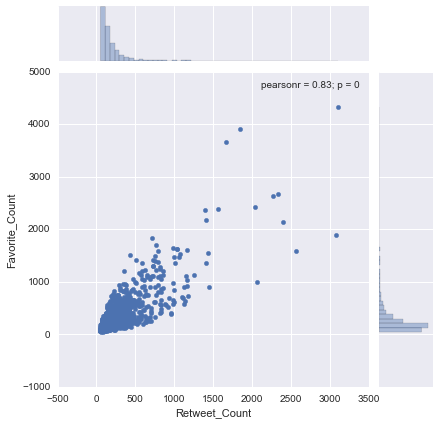

In [23]:
sns.jointplot(data['Retweet_Count'], data['Favorite_Count'])

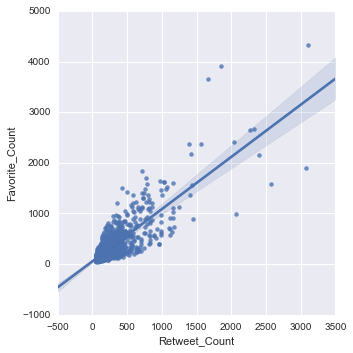

In [22]:
sns.lmplot(x='Retweet_Count', y='Favorite_Count', data=data)

In [12]:
def fit_model(X,Y):
    model=sm.OLS(Y,X)
    result=model.fit()
    print(result.summary())
    return result

In [17]:
Y=data['Favorite_Count']
X=data['Retweet_Count']
X=sm.add_constant(X)
Result_RT=fit_model(X,Y)

                            OLS Regression Results                            
Dep. Variable:         Favorite_Count   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     5442.
Date:                Thu, 28 Jul 2016   Prob (F-statistic):               0.00
Time:                        17:21:37   Log-Likelihood:                -16485.
No. Observations:                2546   AIC:                         3.297e+04
Df Residuals:                    2544   BIC:                         3.299e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            54.8726      4.171     13.155

In [16]:
def plot_function(X,Y,X_prime,Y_hat,xlab,ylab,title):
    plt.scatter(X,Y,alpha=0.3)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.plot(X_prime[:,1],Y_hat,'r',alpha=0.9)
    plt.title(title,fontsize=15)

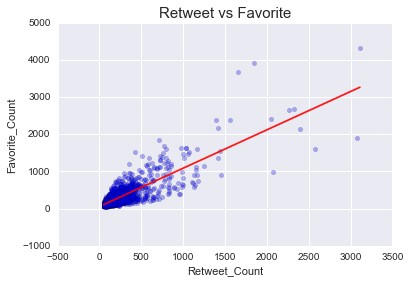

In [20]:
# Plotting the scatter
X_prime=np.linspace(X.Retweet_Count.min(),X.Retweet_Count.max(),100)[:,np.newaxis]
X_prime=sm.add_constant(X_prime)
Y_hat=Result_RT.predict(X_prime)
plot_function(X.Retweet_Count, Y, X_prime, Y_hat, 'Retweet_Count', 'Favorite_Count', 'Retweet vs Favorite')